## 2. 데이터 수집

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('class_data/train.csv')
test = pd.read_csv('class_data/test.csv')
submission = pd.read_csv('class_data/sample_submission.csv')

In [2]:
train1 = train.copy()

# 3. 탐색적 데이터 분석 및 전처리(EDA:Exploratory Data Analysis)
- 데이터를 이해하자!
- 결측치, 이상치, 오류가 있는지 확인
    - 결측치 : 컬럼의 값이 없는 데이터
    - 이상치 : 다른 값들과 차이가 큰 값
    - 오류치 >> 이상치 >> 결측치 순으로 데이터 전처리하기!
- 기술 통계
- 상관 관계
- 시각화
### 데이터 전처리 방법
- 통합(Grouping, 범주형 데이터의 클래스가 너무 많을 시, 사용),
- 인코딩,
- 정규화,
- 라벨 인코딩 등을 통해 데이터 전처리

In [3]:
train1.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

In [4]:
train1.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### <속성 정보>
- 나이: 연속.
- 작업 클래스: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, 무급, 무직.
- fnlwgt: 연속.
- 학력: 학사, 일부 대학, 11학년, 고등학교 대학원, Prof-school, Assoc-acdm, Assoc-voc, 9, 7-8, 12, 석사, 1-4, 10, 박사, 5-6, 유아원.
- 교육 번호: 연속.
- 결혼 상태: 기혼-시민-배우자, 이혼, 미혼, 별거, 사별, 기혼-배우자-부재, 기혼-AF-배우자.
- 직업: 기술 지원, 공예 수리, 기타 서비스, 판매, 간부 관리, 전문 전문, 핸들러-청소부, 기계 작동 검사, Adm-사무, 농업-낚시, 운송-이사, Priv-house- serv, Protective-serv, 군대.
- 관계: 아내, 자녀, 남편, 가족 외, 친척, 미혼.
- 인종: 백인, Asian-Pac-Islander, Amer-Indian-Eskimo, 기타, 흑인.
- 성별: 여성, 남성.
- 자본 이득: 연속.
- 자본 손실: 계속.
- 주당 시간: 연속.
- 출신국: 미국, 캄보디아, 영국, 푸에르토리코, 캐나다, 독일, 미국 외곽(괌-USVI 등), 인도, 일본, 그리스, 남부, 중국, 쿠바, 이란, 온두라스, 필리핀, 이탈리아 , 폴란드, 자메이카, 베트남, 멕시코, 포르투갈, 아일랜드, 프랑스, ​​도미니카 공화국, 라오스, 에콰도르, 대만, 아이티, 콜롬비아, 헝가리, 과테말라, 니카라과, 스코틀랜드, 태국, 유고슬라비아, 엘살바도르, 트리나다드 토바고, 페루, 홍 , 네덜란드-네덜란드.

- 연속(수치형) 데이터 : age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- 범주형 데이터 : workclass, education, marital-status, occupation, relationship, race, sex, native-country

In [5]:
def strip_data(df) :
    for col in df.columns :
        try :
            df[col] = [d.strip() for d in df[col]]
        except :
            df[col] = [int(str(d).strip()) for d in df[col]]
    return print('공백 제거 완료.')
strip_data(train1)
strip_data(test)

공백 제거 완료.
공백 제거 완료.


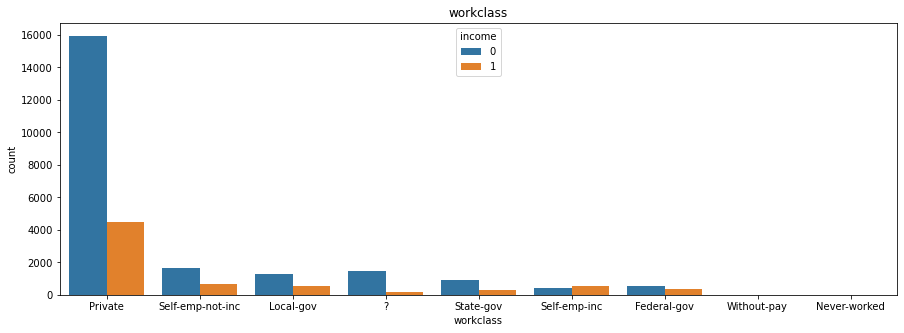

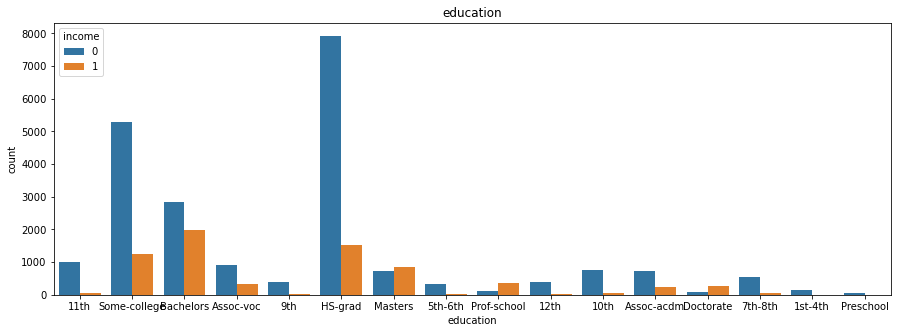

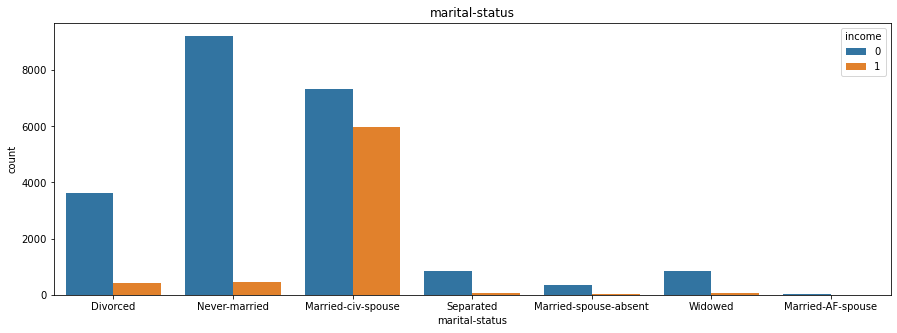

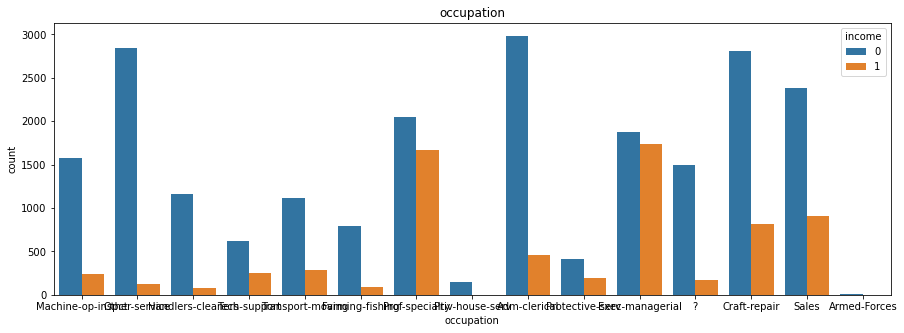

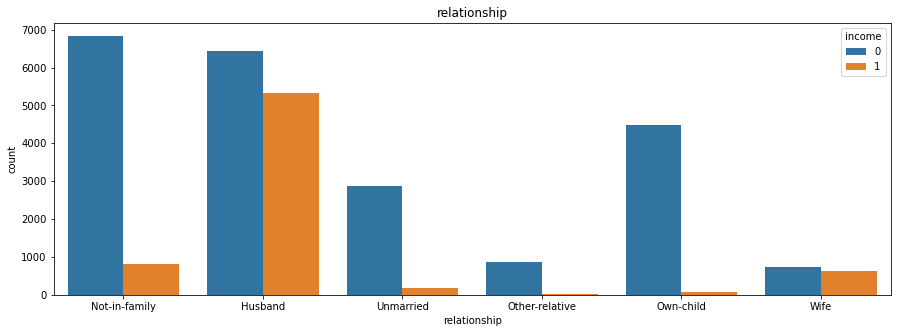

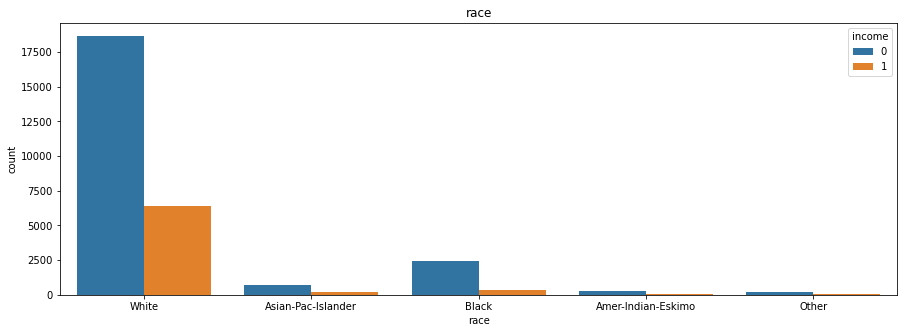

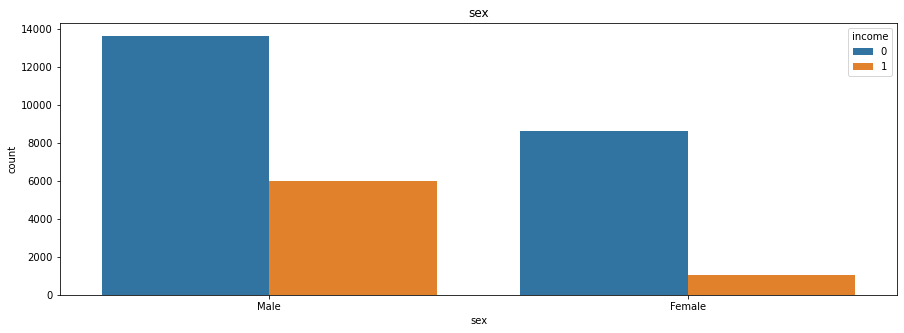

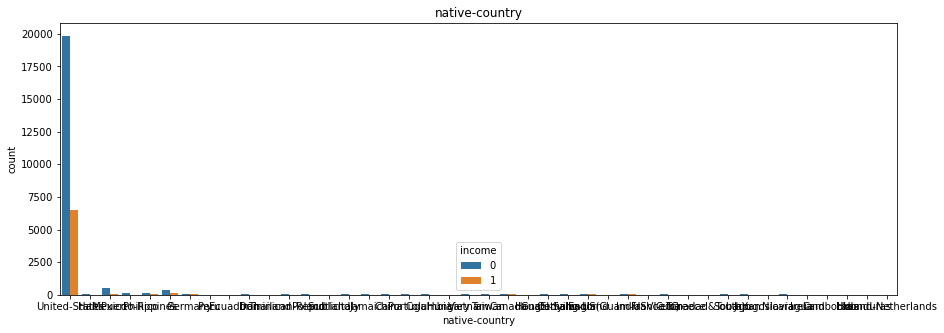

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in class_col :
    plt.figure(figsize=(15,5))
    sns.countplot(
        data = train1,
        x = col,
        hue = 'income'
    )
    plt.title(col)
    plt.show()

## ?를 쉽게 세는 법

In [7]:
def data_info(df) :
    for col in df.columns :
        try:
            null = df[col].value_counts().loc["?"]
        except:
            null = 0
        print(f'{col:10s}\t{len(df[col]) - null} non-null')
data_info(train1)
#data_info(test)

no        	29305 non-null
age       	29305 non-null
workclass 	27642 non-null
fnlwgt    	29305 non-null
education 	29305 non-null
education-num	29305 non-null
marital-status	29305 non-null
occupation	27637 non-null
relationship	29305 non-null
race      	29305 non-null
sex       	29305 non-null
capital-gain	29305 non-null
capital-loss	29305 non-null
hours-per-week	29305 non-null
native-country	28810 non-null
income    	29305 non-null


- 결측치 데이터 있는 칼럼 :workclass, occupation, native-country

In [8]:
# def drop_data(df) :
#     data = df.copy()
#     for col in data.columns :
#         data = data[~(data[col].isin(['?']))]
#     return data
# train1 = drop_data(train1)
# data_info(train1)

In [9]:
train1.corr()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
no,1.000000,0.001111,0.002347,-0.008466,0.003916,0.003246,0.003166,-0.004080
age,0.001111,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,-0.008466,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.003916,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.003166,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,-0.004080,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


### 범주형 데이터 시각화

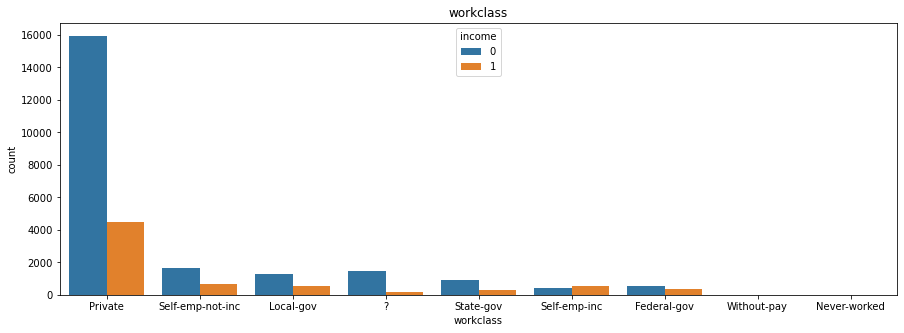

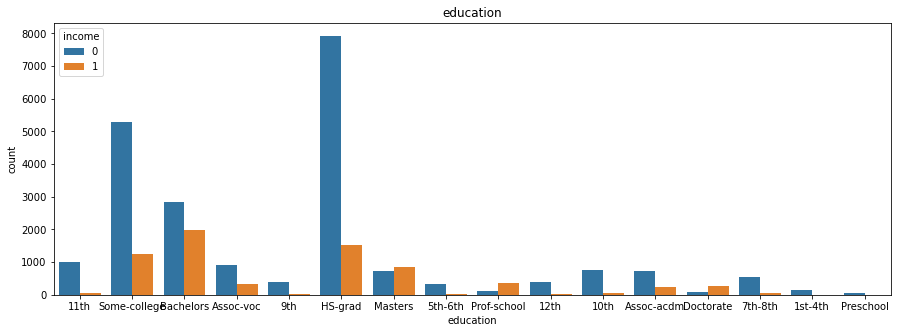

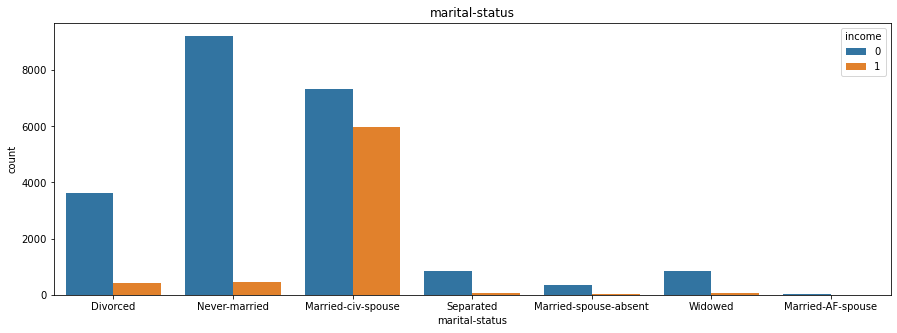

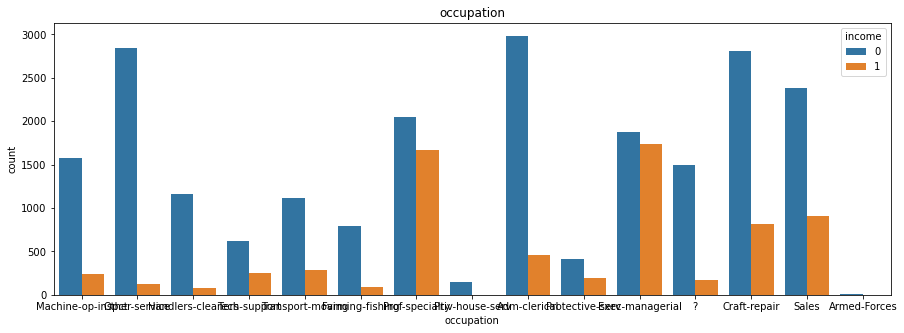

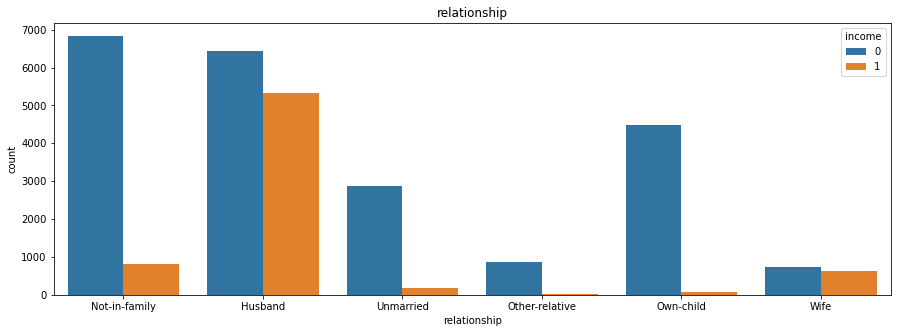

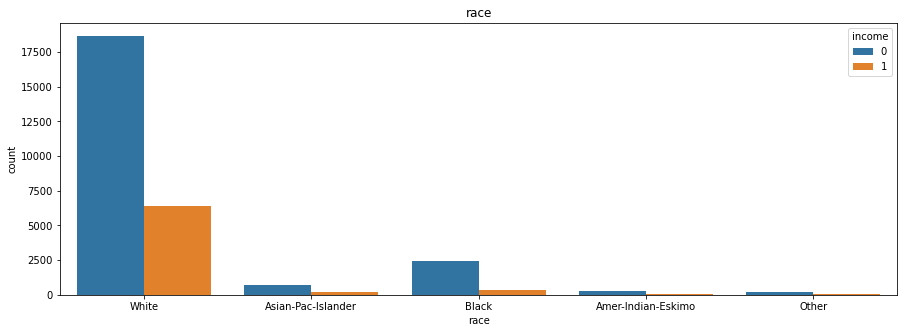

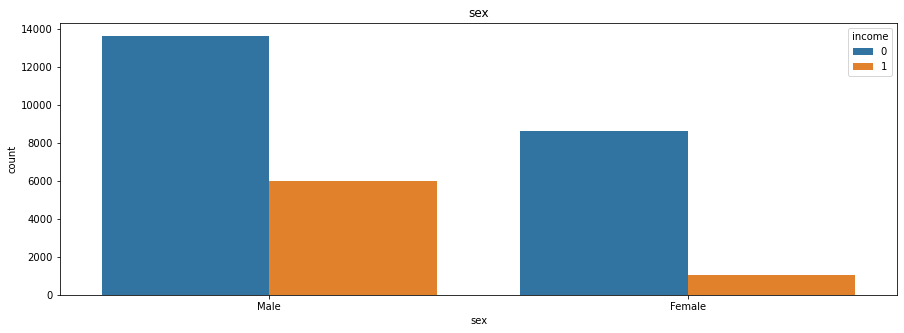

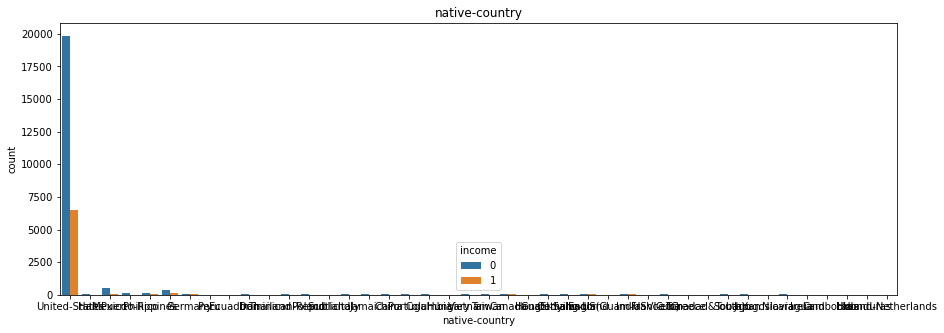

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

class_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in class_col :
    plt.figure(figsize=(15,5))
    sns.countplot(
        data = train1,
        x = col,
        hue = 'income'
    )
    plt.title(col)
    plt.show()

### 결측치 제거 및 분리

In [11]:
country_mapping1 = train1['native-country'].map({
        'United-States' : 'United-States',
        'Mexico' : 'Mexico'
})
train1['native-country'] = country_mapping1.fillna('Other')

country_mapping2 = test['native-country'].map({
    'United-States' : 'United-States',
    'Mexico' : 'Mexico',
    "?" : 'United-States'
})
test['native-country'] = country_mapping2.fillna('Other')
data_info(test)
test['native-country'].value_counts()

no        	19537 non-null
age       	19537 non-null
workclass 	18401 non-null
fnlwgt    	19537 non-null
education 	19537 non-null
education-num	19537 non-null
marital-status	19537 non-null
occupation	18396 non-null
relationship	19537 non-null
race      	19537 non-null
sex       	19537 non-null
capital-gain	19537 non-null
capital-loss	19537 non-null
hours-per-week	19537 non-null
native-country	19537 non-null


United-States    17893
Other             1272
Mexico             372
Name: native-country, dtype: int64

In [12]:
null_train = train1[(train1['workclass']== '?') | (train1['occupation']== '?')]
null_test = test[(train1['workclass']== '?') | (test['occupation']== '?')]
notnull_train = train1[(train1['workclass']!= '?') & (train1['occupation']!= '?')]
notnull_test = test[(test['workclass']!= '?') & (test['occupation']!= '?')]

C:\Users\AI\AppData\Local\Temp\ipykernel_8548\1384727353.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  null_test = test[(train1['workclass']== '?') | (test['occupation']== '?')]


### 범주형 데이터 인코딩

In [16]:
categorical_features = [ 'marital-status','education', 'relationship', 'race', 'sex', 'native-country']

for feature_name in categorical_features :
    # prefix : 접두어. / 같은 category를 가진 특성이 여러개 일 경우, 접두어를 붙여 특성의 category를 구분. qh
    one_hot = pd.get_dummies(notnull_train[feature_name], prefix = feature_name)
    notnull_train = pd.concat([notnull_train,one_hot], axis = 1)
    notnull_train.drop(feature_name, axis=1, inplace = True)
    
    one_hot = pd.get_dummies(notnull_test[feature_name], prefix = feature_name)
    notnull_test = pd.concat([notnull_test,one_hot], axis = 1)
    notnull_test.drop(feature_name, axis=1, inplace = True)
    
    one_hot = pd.get_dummies(null_train[feature_name], prefix = feature_name)
    null_train = pd.concat([null_train,one_hot], axis = 1)
    null_train.drop(feature_name, axis=1, inplace = True)
    
    one_hot = pd.get_dummies(null_test[feature_name], prefix = feature_name)
    null_test = pd.concat([null_test,one_hot], axis = 1)
    null_test.drop(feature_name, axis=1, inplace = True)

KeyError: 'marital-status'

In [ ]:
data_info(test)

### 수치형 데이터 시각화

- capital-gain, -loss = 0 일 때, 대부분 income =0

In [ ]:
train1['capital'] = train1['capital-gain'] - train1['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']
null_train['capital'] = null_train['capital-gain'] - null_train['capital-loss']
null_test['capital'] = null_test['capital-gain'] - null_test['capital-loss']
notnull_train['capital'] = notnull_train['capital-gain'] - notnull_train['capital-loss']
notnull_test['capital'] = notnull_test['capital-gain'] - notnull_test['capital-loss']

In [ ]:
train1 = train1.loc[:, ['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital', 'hours-per-week', 'native-country',
       'income']]

In [ ]:
test1 = test.loc[:, ['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital', 'hours-per-week', 'native-country']]

In [ ]:
# 원핫인코딩
categorical_features = ['marital-status', 'relationship', 'race', 'sex', 'native-country']

for feature_name in categorical_features :
    # prefix : 접두어. / 같은 category를 가진 특성이 여러개 일 경우, 접두어를 붙여 특성의 category를 구분. qh
    one_hot = pd.get_dummies(train1[feature_name], prefix = feature_name)
    train1 = pd.concat([train1,one_hot], axis = 1)
    train1.drop(feature_name, axis=1, inplace = True)

In [ ]:
# 원핫인코딩
categorical_features = ['marital-status', 'relationship', 'race', 'sex', 'native-country']

for feature_name in categorical_features :
    # prefix : 접두어. / 같은 category를 가진 특성이 여러개 일 경우, 접두어를 붙여 특성의 category를 구분. qh
    one_hot = pd.get_dummies(test1[feature_name], prefix = feature_name)
    test1 = pd.concat([test1,one_hot], axis = 1)
    test1.drop(feature_name, axis=1, inplace = True)

In [ ]:
# # reg_col = ['age', 'fnlwgt', 'education-num', 'capital', 'hours-per-week']
# reg_col = ['capital']
# for col in reg_col :
#     plt.figure(figsize=(15,5))
#     sns.kdeplot(
#     data = train1,
#     x = col,
#     hue = 'income'
#     )
#     plt.title(col)
#     plt.xticks(range(-10000,120000,1000))
#     plt.show()

In [ ]:
# col = ['age', 'fnlwgt', 'education-num', 'capital',
#        'hours-per-week','workclass_Federal-gov',
#        'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
#        'workclass_Self-emp-not-inc', 'workclass_State-gov',
#        'workclass_Without-pay', 'education_10th', 'education_11th',
#        'education_12th', 'education_1st-4th', 'education_5th-6th',
#        'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
#        'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
#        'education_HS-grad', 'education_Masters', 'education_Preschool',
#        'education_Prof-school', 'education_Some-college',
#        'marital-status_Divorced', 'marital-status_Married-AF-spouse',
#        'marital-status_Married-civ-spouse',
#        'marital-status_Married-spouse-absent', 'marital-status_Never-married',
#        'marital-status_Separated', 'marital-status_Widowed',
#        'occupation_Adm-clerical', 'occupation_Armed-Forces',
#        'occupation_Craft-repair', 'occupation_Exec-managerial',
#        'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
#        'occupation_Machine-op-inspct', 'occupation_Other-service',
#        'occupation_Priv-house-serv', 'occupation_Prof-specialty',
#        'occupation_Protective-serv', 'occupation_Sales',
#        'occupation_Tech-support', 'occupation_Transport-moving',
#        'relationship_Husband', 'relationship_Not-in-family',
#        'relationship_Other-relative', 'relationship_Own-child',
#        'relationship_Unmarried', 'relationship_Wife',
#        'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
#        'race_Other', 'race_White', 'sex_Female', 'sex_Male',
#        'native-country_Mexico', 'native-country_Other',
#        'native-country_United-States']

In [ ]:
col = ['age', 'education-num', 'capital',
       'hours-per-week',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male',
       'native-country_Mexico', 'native-country_Other',
       'native-country_United-States']

In [ ]:
col_x = ['age', 'education-num', 'capital',
       'hours-per-week', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male',
       'native-country_Mexico', 'native-country_Other',
       'native-country_United-States']

In [ ]:
X_train = train1.loc[:,col]
y_train = train1.loc[:,'income']

In [ ]:
X_train1 = notnull_train.loc[:,col_x]
y_trian1 = notnull_train.loc[:, 'work']
X_test1 = null_train.loc[:col_x]

### TEST 데이터 정리

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
# KNN 모델

for i in range(10) :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train1, y_train1, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    neighbor = range(5, 30, 2)
    for k in neighbor :
        knn_model2 = KNeighborsClassifier(n_neighbors=k)
        knn_model2.fit(X_train2, y_train2)
        train_acc.append(knn_model2.score(X_train2, y_train2))
        test_acc.append(knn_model2.score(X_val, y_val))
    plt.plot(neighbor, train_acc, c='r', label = 'train')
    plt.plot(neighbor, test_acc, c='b', label = 'test')
    plt.xticks( range(5, 30, 2))
    plt.grid()
    plt.title(f'knn_model({i})')
    plt.legend(loc='upper right')
    plt.show()

NameError: name 'train_test_split' is not defined

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=8)

knn_model2 = KNeighborsClassifier(n_neighbors=17)
knn_model2.fit(X_train2, y_train2)
knn_pre = knn_model2.predict(test1)
submission['income'] = knn_pre
submission.to_csv('class_data/KNN_pre.csv', index = False)

In [ ]:
# 결정 트리 : max_depth
from sklearn.tree import DecisionTreeClassifier

# for i in range(100) :
#     X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
#     train_acc = []
#     test_acc = []

#     max_depth = range(1, 20, 1)
#     for d in max_depth :
#         dt_model = DecisionTreeClassifier(max_depth = d)
#         dt_model.fit(X_train2, y_train2)
#         train_acc.append(dt_model.score(X_train2, y_train2))
#         test_acc.append(dt_model.score(X_val, y_val))
#     plt.plot(max_depth, train_acc, c='r', label = 'train')
#     plt.plot(max_depth, test_acc, c='b', label = 'test')
#     plt.xticks(max_depth, range(1, 20, 1))
#     plt.grid()
#     plt.title(f'DecisionTree_model({i})')
#     plt.legend(loc='upper right')
#     plt.show()

In [ ]:
# 9 /12 /
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=94)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(max_depth = 8)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('class_data/dt_pre_by_MDepth.csv', index = False)

In [ ]:
# 결정 트리 : min_sample_split

# for i in range(100) :
#     X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
#     train_acc = []
#     test_acc = []

#     min_sample_splt = range(10,150,10)
#     for d in min_sample_splt :
#         dt_model = DecisionTreeClassifier(min_samples_split = d)
#         dt_model.fit(X_train2, y_train2)
#         train_acc.append(dt_model.score(X_train2, y_train2))
#         test_acc.append(dt_model.score(X_val, y_val))
#     plt.plot(min_sample_splt, train_acc, c='r', label = 'train')
#     plt.plot(min_sample_splt, test_acc, c='b', label = 'test')
#     plt.xticks(min_sample_splt, range(10,150,10))
#     plt.grid()
#     plt.title(f'DecisionTree_model({i})')
#     plt.legend(loc='upper right')
#     plt.show()

In [ ]:
#27-130/74-120/
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=74)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(min_samples_split = 120)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('class_data/dt_pre_by_mSmpleSplt.csv', index = False)

In [ ]:
# 결정 트리 : max_leaf_nodes

# for i in range(100) :
#     X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
#     train_acc = []
#     test_acc = []

#     max_leaf_nod = range(70,100,1)
#     for d in max_leaf_nod :
#         dt_model = DecisionTreeClassifier(max_leaf_nodes = d)
#         dt_model.fit(X_train2, y_train2)
#         train_acc.append(dt_model.score(X_train2, y_train2))
#         test_acc.append(dt_model.score(X_val, y_val))
#     plt.plot(max_leaf_nod, train_acc, c='r', label = 'train')
#     plt.plot(max_leaf_nod, test_acc, c='b', label = 'test')
#     plt.xticks(range(70,100,1))
#     plt.grid()
#     plt.title(f'DecisionTree_model({i})')
#     plt.legend(loc='upper right')
#     plt.show()

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=23)
train_acc = []
test_acc = []

dt_model = DecisionTreeClassifier(max_leaf_nodes = 51)
dt_model.fit(X_train2, y_train2)
dt_pre = dt_model.predict(test1)
submission['income'] = dt_pre
submission.to_csv('data/dt_pre_by_MLeafNodes.csv', index = False)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(
#         n_estimators = 100,   # 깅할 모델 갯수
#         max_features = 0.5,   # 각 모델이 랜덤하게 사용할 특성 수
#         max_depth = 8,        # 각 모델의 최대 깊이
#         min_samples_leaf = 10,# 리프 노드의 최소 샘플 수
#         random_state = 72     # 난수 고정
#                                  )

In [ ]:
# 그리드 서치
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 탐색하고 싶은 하이퍼파라미터 조합을 딕셔너리로 생성
param_grid = {
    'max_depth' : range(5, 30, 5),
    'n_estimators' : range(100, 300, 50),
    'max_features' : [0.3, 0.5, 0.7, 0.9],
    'min_samples_leaf' : range(10, 30, 10)
}
for i in range(5) :
    train_acc = []
    train.param = []
    model = RandomForestClassifier(random_state = i)
    grid = GridSearchCV(model,param_grid, cv=5, n_jobs = -1) # 튜닝할 모델, 사용할 파라미터, 교차검증 횟수(-1: 다 쓰는 것)
    grid.fit(X_train, y_train)

    train_acc.append(grid.best_score_) # 최고 조합의 정확도 반환
    train_param.append(grid.best_params_) # 최고 조합의 매개 변수 반환
    
    plt.plot(range(100), train_acc, c='r', label = 'train')
    plt.plot(range(100), train_param, c='b', label = 'test')
    plt.xticks(range(100))
    plt.grid()
    plt.title(f'GridSearchCV')
    plt.legend(loc='upper right')
    plt.show()
# # 최고 조합으로 학습 완료된 모델
# best_model = grid.best_estimator_ 
# pre = best_model.predict(X_test)
# submission['Survived'] = pre
# submission.to_csv('data/rf_pre.csv', index = False)

In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
max_score = [0, 0, 0]
for k in range(100) :
    for j in range(100, 140) :
        for i in range(5, 15) :
            rf_model = RandomForestClassifier(
                    n_estimators = 100,   # 깅할 모델 갯수
                    max_features = 0.5,   # 각 모델이 랜덤하게 사용할 특성 수
                    max_depth = i,        # 각 모델의 최대 깊이
                    min_samples_leaf = j,# 리프 노드의 최소 샘플 수
                    random_state = k    # 난수 고정
                                             )


            rf_rs = cross_val_score(rf_model, X_train, y_train, cv=5)
            if max(rf_rs) > max_score[-1] :
                max_score = [j,i,max(rf_rs)]
                print(max_score)
print(f'min_sample_split:{max_score[0]} / max_depth:{max_score[1]} / 정확도 : {max_score[2]}')

## 3.1 결측치 확인

### 결측치 채우는 방법
- 수치형 데이터
    - 기술 통계(평균 or 중간값)
    - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
    - 결측치가 많은 경우(20~30%) : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는(동일한 특성을 갖는) 데이터의 결측치 통계(평균, or 중간값)를 사용 (피벗 테이블을 이용할 것임)
- 범주형 데이터
    - 결측치가 적은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문에)
    - 결측치가 많은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 편향이 됨 >> 기존 데이터의 개수 비율만큼 랜덤으로 할당

## 3.7 데이터 시각화 하기
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.

- 범주형 데이터(Categorical Data) 시각화
- 빈도 기반의 bar chart 많이 활용

- 수치형 데이터 시각화
    - 구간을 나눠서 종합하는 히스토그램
    - 커널 밀도 추정 그래프
    
- 바이올린 플롯 그래프 시각화
    - 박스 + KDE 그래프
- 텍스트 데이터
    - 비정형 데이터 >> 단어 중심 시각화
    - wordcloud
- 빈도 기반의 시각화 가능 : countplot

## 4. 특성 공학(Feature Engineering)
- feature에서 유의미한 컬럼을 추출하거나 병합하는 행위

### 4.2 비정형 데이터 다루기(Name)
- 틀이 없는, 형태가 정해져 있지 않음
- 텍스트 데이터, 이미지 데이터, 음성 데이터

###  사용하지 않을 칼럼 정리

## 모델링
- 인코딩(문자 형태의 데이터를 숫자 형태로 변환)
    - label encoding : 순서가 있는 범주형 데이터에 사용
    - one-hot-encoding : 순서가 없는 범주형 데이터에 사용 / pd.get_dummies(데이터)
        - 순서가 없는 범주형 데이터 : 성별
        - 순서가 있는 범주형 데이터 : 학점
- 특성 선택(feature selection) : 상관계수(.corr() : 양수-비례관계, 음수-반비례관계, 0-서로 영향X, 절대값이 클수록 상관관계 큼)
- 모델 선택 및 하이퍼파라미터 튜닝
- 모델 학습 및 평가

## 5.2 특성 선택
- 예측 결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

## 5.3 학습
- KNN모델과 Decision Tree모델 활용

## 데이터 스케일링(Data Scaling)
- 특성들의 범위를 정규화 해주는 작업
- 특성마다 다른 범위를 가지는 경우, 머신러닝 모델들이 제대로 학습되지 않을 가능성이 있다.
    - KNN, SVM, Neural network(신경망) 모델, Clustering 모델 등 (데이터 스케일링의 영향을 많이 받는 모델)
    - 시력과 키를 함께 학습시킬 경우, 키의 범위가 크기 때문에 거리 값을 기반으로 학습할 때 영향을 많이 준다.
    - 시력 0.5 ~ 2.0(폭 1.5) / 키 150 ~ 190(폭 40) >> 정규화가 필요
    
#### 장점
- 특성들을 비교 분석하기 쉽게 만들어 준다.
- Linear Model, Neural network Model 등에서 학습의 안정성과 속도를 개선시킨다.
- 하지만 특성에 따라 원래 범위를 유지하는 것이 성능에 더 좋을 때에는 스케일링을 해 주지 않아도 된다.


### 종류
#### StandardScaler
- 평균과 표준편차를 이용한 방법
- 평균은 극단적인 값(이상치)들의 영향을 많이 받음
#### MinMaxScaler
- 최대, 최솟값을 이용한 방법 (공식, 교재 122쪽 중간 참고)
- 모든 데이터 값이 0 ~ 1 사이의 값으로 조정됨
#### RobustScaler
- 사분위 수를 이용한 스케일러
- 데이터에 이상치가 많을 때 사용하면 좋은 스케일러
#### Normalizer
- 데이터의 크기는 고려하지 않고
- 데이터의 방향을 중요시할 때 사용하는 스케일러
- 추천 알고리즘에 많이 사용
    - 예를 들어 음식 추천 알고리즘 :
    - 나와 근접한 사람은 누가 있을까? 그 사람들이 좋아하는 음식을 추천
    - 1번과 3번보다는 1번과 2번을 비교해 보면 거리가 1번과 2번이 더 멀기 때문에 컴퓨터가 3번을 추천해버리는 문제가 발생!!
- 원점으로부터의 방향만 비교하면 비슷한 취향으로 추천 가능
- 원처럼 동그란 데이터를 갖게 됨

### 주의점
- 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
- 예를 들어 StandardScaler의 경우 훈련 세트의 평균과 표준편차를 이용해 훈련세트를 변환하고 테스트 세트의 평균과 표준편차를 이용해 테스트 세트를 변환하면 잘못된 결과가 나온다.
- 훈련 데이터를 쓰던지 테스트 데이터를 쓰던지 모두 훈련 데이터를 기준으로 스케일링을 해야한다!

### 5.4 하이퍼 파라미터 튜닝
- KNN모델과 DecisionTree 모델을 최적화 해보자.
- KNN : 이웃 숫자
- Tree : 나무의 깊이, 리프노드의 갯수, 한 리프노드에 들어갈 샘플 수 등

### 모델 평가
- KNN의 이웃 수 : 7결정
- DecisionTree의 최대 깊이 : 4결정

# 성능 개선을 위해 고려해 볼 사항
1. 특성 선택
2. 데이터 확보
3. 전처리 작업 변경(결측치 처리 방법, 특성 공학, 스케일링 등)
4. 모델 변경 - 앙상블 : 모델을 여러개 엮어서 쓰는 것